
# Principal components analysis (PCA)

These figures aid in illustrating how a point cloud
can be very flat in one direction--which is where PCA
comes in to choose a direction that is not flat.


In [2]:
# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# License: BSD 3 clause

## Create the data



In [18]:
import numpy as np
from scipy import stats

# Calculate the mathematical constant 'e': 
e = np.exp(1)
# Ensures reproducibilty of random numbers by seeding random number generator
np.random.seed(4)


def pdf(x):
    '''Calculates a probability density function (pdf) using a mixture of two normal distributions with different scales. 
       Stats.norm object represents a normal (Gaussian) distribution with std = scale.
       stats.norm.pdf calculates the probability density function, x is the value at which to eval the probabilty density function.
       Returns: The weighted sum of the pdfs of these two normal distributions.
       '''
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))

#Generates an array of 30,000 random numbers sampled from a normal distribution with a standard deviation of 0.5.
y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
#Generates an array of random numbers sampled from a normal distribution with a standard deviation of 0.1, with length being the same as x.
z = np.random.normal(scale=0.1, size=len(x))

#Product of density function evaluated at all points in x and y array.
density = pdf(x) * pdf(y)
#Scales z by 5 before evaluating density function at points in z array.
pdf_z = pdf(5 * z)
# Multiply everything in density array element wise by the values in pdf_z.
density *= pdf_z

#Creates three new arrays based on combinations of x, y and z.
a = x + y
b = 2 * y
c = a - b + z

#Calculates square root of the sum of variances a and b.
norm = np.sqrt(a.var() + b.var())
#Normalizes arrays by dividing each element by the norm. Ensures that combined arrays a and b have the same normalized scale.
a /= norm
b /= norm

## Plot the figures



[[-0.33847725 -0.7109608   0.61641536]
 [-0.77400604 -0.1621726  -0.61205775]
 [ 0.53511475 -0.68427684 -0.49539622]]
###
[[-0.33847725 -0.7109608   0.61641536]
 [-0.77400604 -0.1621726  -0.61205775]
 [ 0.53511475 -0.68427684 -0.49539622]]
###


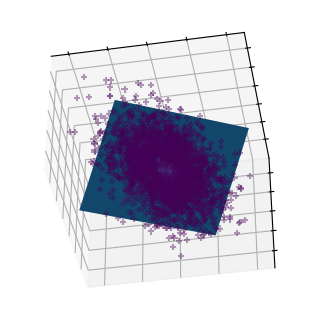

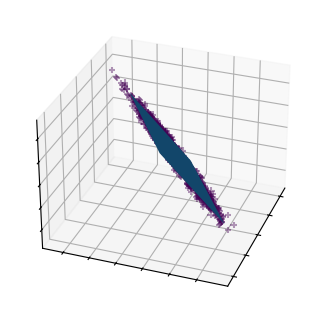

In [17]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA


def plot_figs(fig_num, elev, azim):
    '''Function that creates a 3D plot with specified criteria.
       Input:
           fig_num: figure number
           elev: elevation angle
           azim: azimuthal angle
    '''
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    # 111 means 1x1 grid, first subplot
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    # Scatter plot of every 10th element of point in arrays a, b, c with colors set by density array.
    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    # .c_ Concatenates arrays along the columns. Ex: [1,2,3] and [4,5,6] become [[1 4][2 5][3 6]]
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    # Use PCA to reduce dimensionality to 3 components.
    pca = PCA(n_components=3)
    pca.fit(Y)
    # Principle components are stored in V. 
    # Principal components are the eigenvectors, the directions in the feature space along which the data varies the most. 
    # pca.components_ is a matrix where each row represents a principal component, and the columns correspond to the original features.
    V = pca.components_.T
    # 3 by 3, original data was 3d.
    print(V)
    print('###')

    # Principle axes and plane are computed based on PCA components. Illustrates axes of most change in data.
    # .r_ row wise concatenates. 
    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

# 2 3D plots are created with different angles using plot_figs defined above. 
elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()